<a href="https://colab.research.google.com/github/Davdsson/Davdsson/blob/master/tasarimproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




----------------------------------------------------------------------------------------------LIBRARY--------------------------------------------------------------------------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
 #pip install keras --upgrade

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Embedding, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from keras.optimizers import RMSprop,Adam,SGD,Nadam,Adamax
from keras.models import Sequential,Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.utils.np_utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from tensorflow.python.keras import backend
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from matplotlib.pyplot import imread
from sklearn.metrics import f1_score 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers as layers
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import metrics
from sklearn.svm import SVC
import plotly.tools as tls
import unittest as units
import tensorflow as tf
from PIL import Image
import pandas as pd
import numpy as np
%matplotlib inline
import PIL as pil
import cv2 as cv2
import warnings
import time
import keras
import glob
import os


# **VERI OKUMA IŞLEMLERI**

In [ ]:
Atlet_data_set_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Atlet/*.jpg")
CocukGiyim_data_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/CocukGiyim/*.jpg")
Gomlek_data_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Gomlek/*.jpg")
Eteklik_data_set_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Eteklik/*.jpg")
Kotmont_data_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Kotmont/*.jpg")
Silip_data_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Silip/*.jpg")

Mont_data_set_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Mont/*.jpg")
Pantalon_data_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Pantalon/*.jpg")
Sort_data_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Sort/*.jpg")

Tisort_data_path = glob.glob("/content/drive/MyDrive/tasarimproje/trendyolData/trainingData/Tisort/*.jpg")


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# **VERI GÖRSELEŞTIRME**

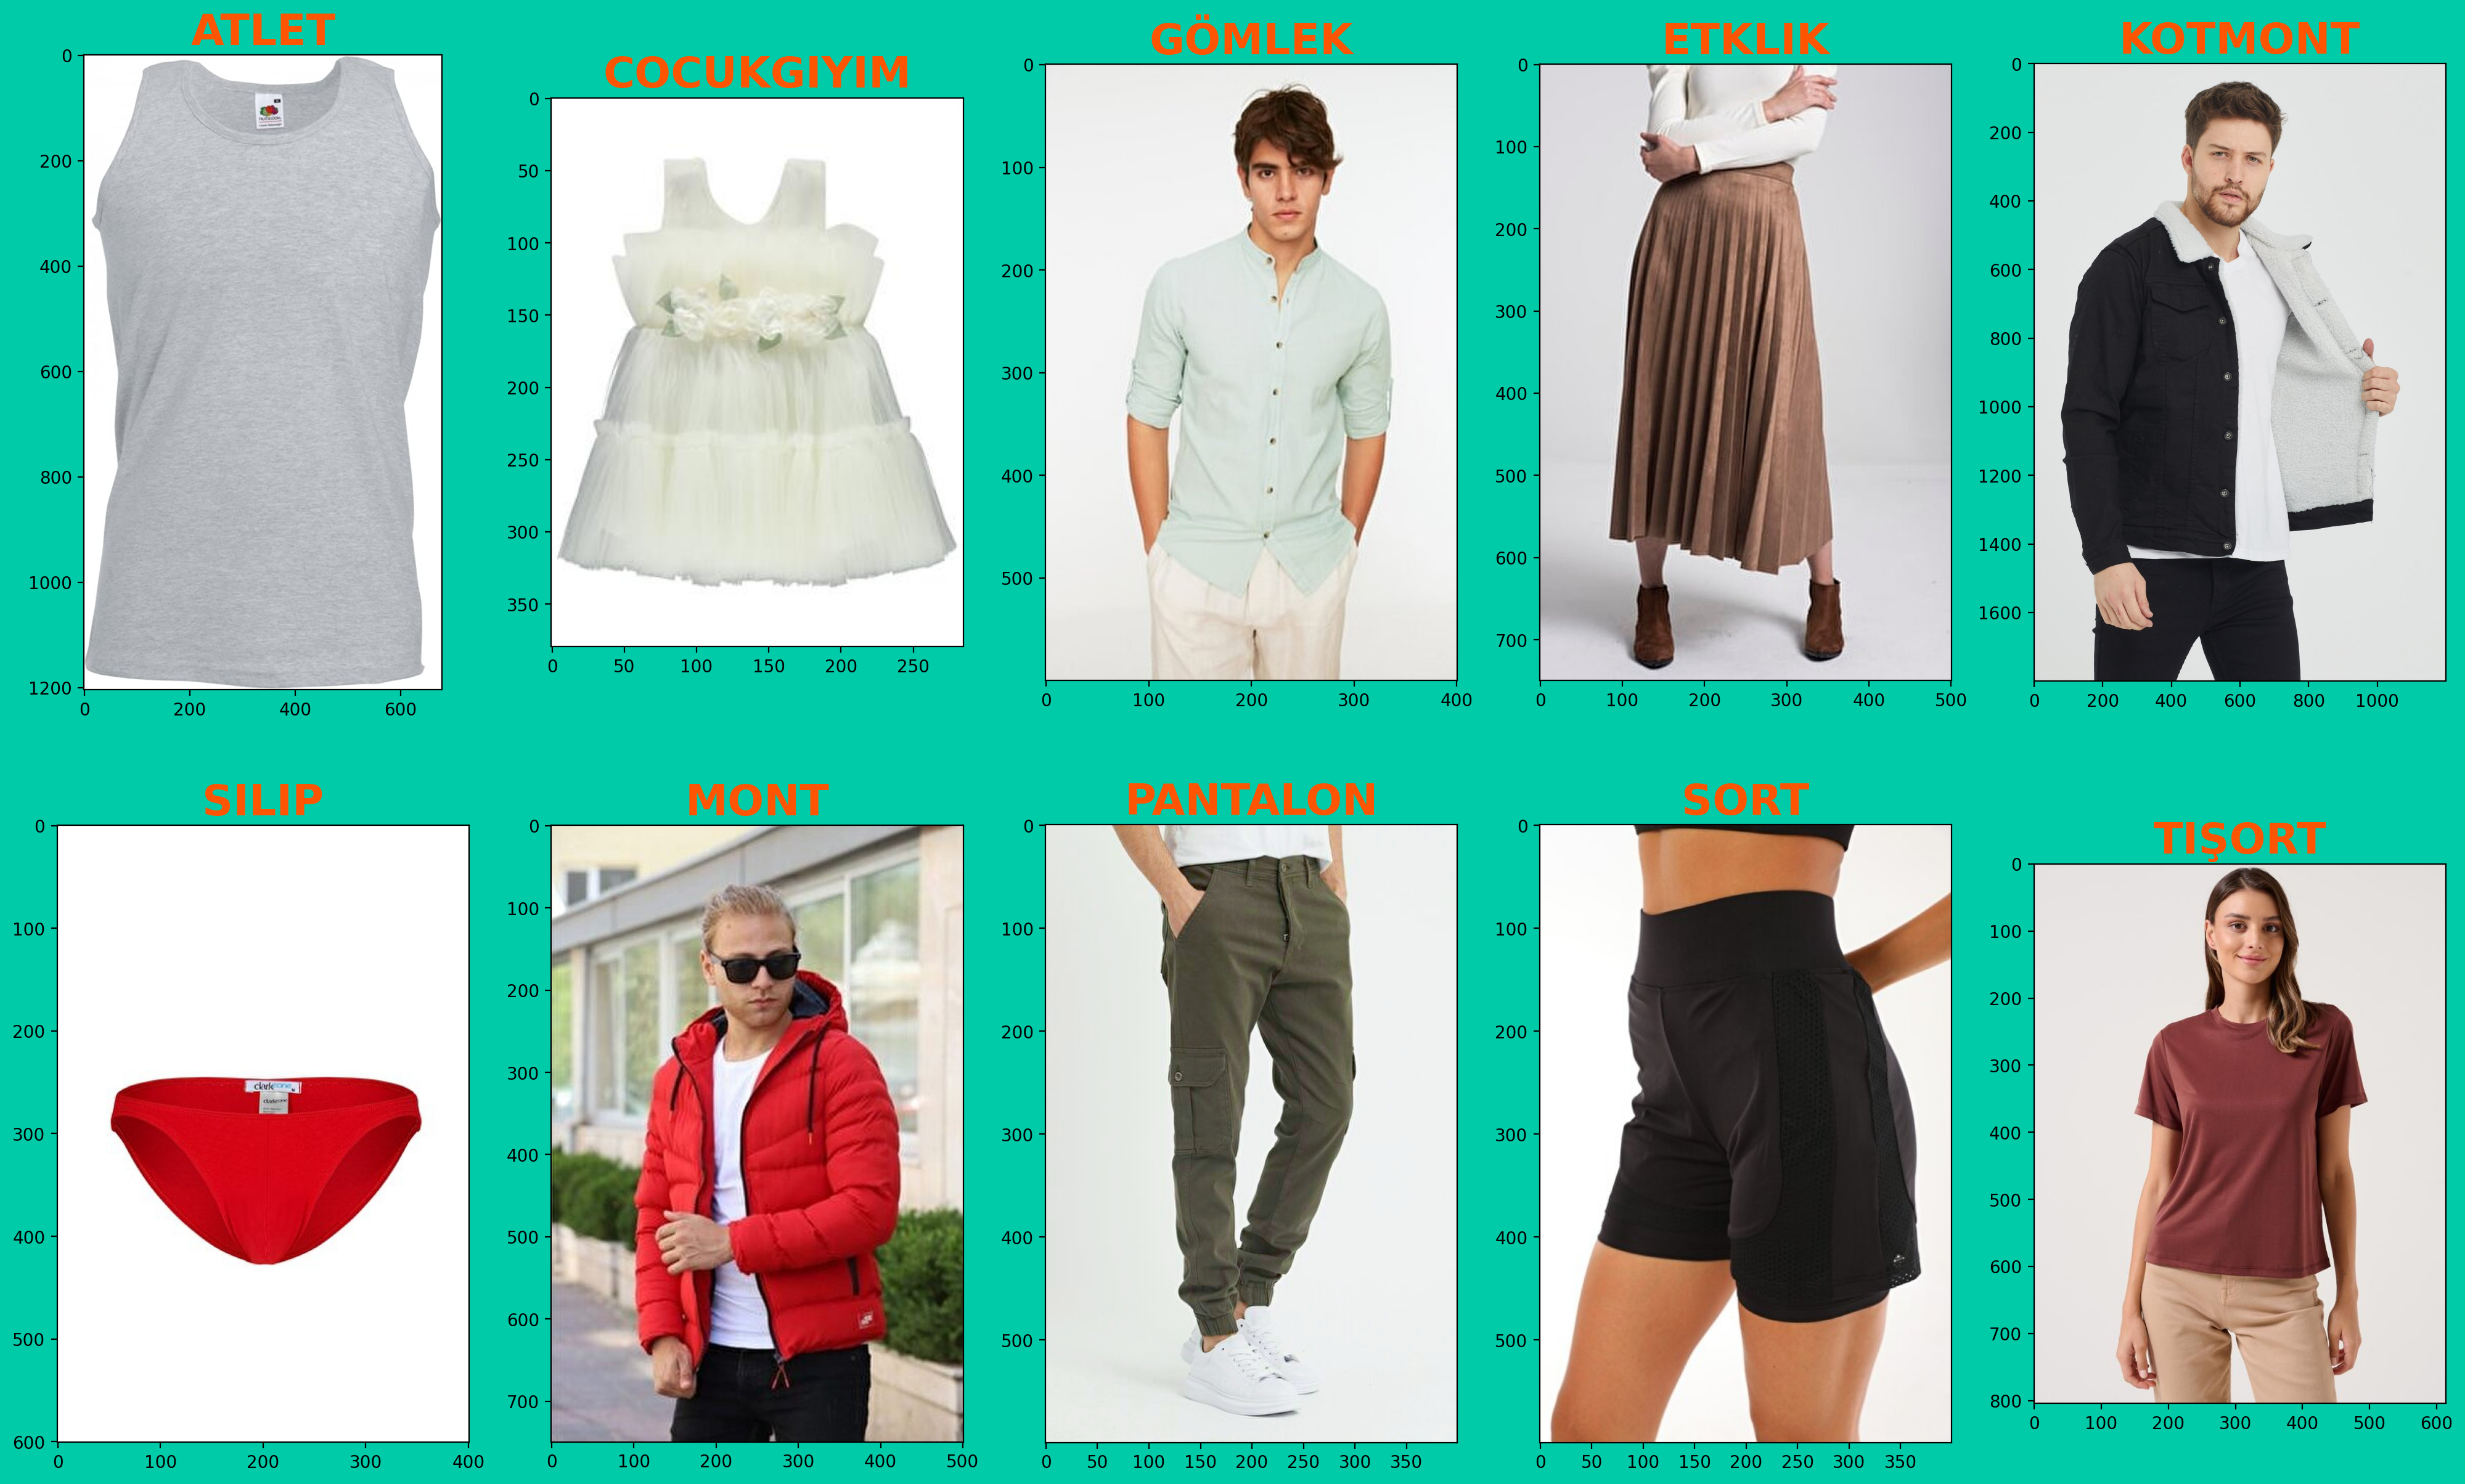

In [ ]:

fig,ax= plt.subplots(2,5, figsize=(25,15), dpi=200, facecolor='#00cba9', edgecolor='k')

ax = ax.flatten()


ax[0].imshow(plt.imread(Atlet_data_set_path[252]))
ax[1].imshow(plt.imread(CocukGiyim_data_path[1]))
ax[2].imshow(plt.imread(Gomlek_data_path[5]) )

ax[3].imshow(plt.imread(Eteklik_data_set_path[410]))
ax[4].imshow(plt.imread(Kotmont_data_path[20]))
ax[5].imshow(plt.imread(Silip_data_path[10]) )

ax[6].imshow(plt.imread(Mont_data_set_path[20]))
ax[7].imshow(plt.imread(Pantalon_data_path[10]))

ax[8].imshow(plt.imread(Sort_data_path[100]) )

ax[9].imshow(plt.imread(Tisort_data_path[10]) )

#SET TITLE TO EACH CATHEGORY
ax[0].set_title("ATLET",fontsize=25, color="#ff5500", fontweight="bold")
ax[1].set_title("COCUKGIYIM",fontsize=25, color="#ff5500", fontweight="bold")
ax[2].set_title("GÖMLEK",fontsize=25, color="#ff5500", fontweight="bold")
ax[3].set_title("ETKLIK",fontsize=25, color="#ff5500", fontweight="bold")
ax[4].set_title("KOTMONT",fontsize=25, color="#ff5500", fontweight="bold")
ax[5].set_title("SILIP",fontsize=25, color="#ff5500", fontweight="bold")
ax[6].set_title("MONT",fontsize=25, color="#ff5500", fontweight="bold")
ax[7].set_title("PANTALON",fontsize=25, color="#ff5500", fontweight="bold")
ax[8].set_title("SORT",fontsize=25, color="#ff5500", fontweight="bold")
ax[9].set_title("TIŞORT",fontsize=25, color="#ff5500", fontweight="bold")

plt.show()

# **VERI KEŞFETME**

**1.RGB IMAGE (Red Green Blue)**

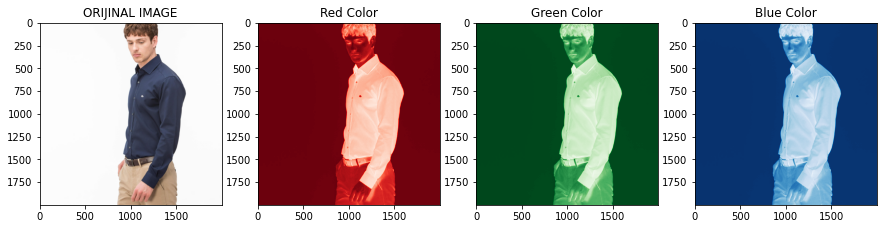

In [ ]:
k = 200
mpl_img_read = plt.imread(Gomlek_data_path[k])   # Matloplib ile veri okuma
mpl_img_read_2 = plt.imread(Gomlek_data_path[k]) # Matloplib ile veri okuma

cv2_img_read= cv2.imread(Gomlek_data_path[k])    # OpenCV ile veri okuma
cv2_img_read_2= cv2.imread(Gomlek_data_path[k])  # OpenCV ile veri okuma
T_img =cv2.imread(Gomlek_data_path[k])           # OpenCV ile veri okuma

#display RGB channels of image

fig,ax= plt.subplots(1,4, figsize=(15,5))
ax[0].imshow(mpl_img_read)

ax[1].imshow(mpl_img_read[:,:,0], cmap='Reds'),
ax[2].imshow(mpl_img_read[:,:,1], cmap='Greens')
ax[3].imshow(mpl_img_read[:,:,2], cmap='Blues')


ax[0].set_title('ORIJINAL IMAGE')
ax[1].set_title('Red Color')
ax[2].set_title('Green Color')
ax[3].set_title('Blue Color')

plt.show()

**2.Matplolib VE OpencV Arasındakı IMAGE plotting farkı**

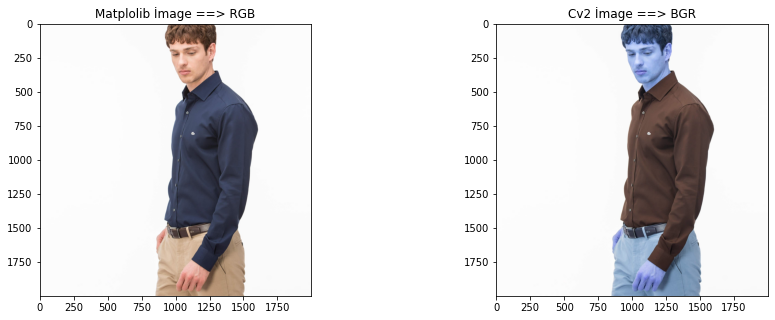

In [ ]:

fig,ax= plt.subplots(1,2, figsize=(15,5))

ax[0].imshow(mpl_img_read_2) # matplolib image
ax[1].imshow(cv2_img_read_2) # cv2 image

ax[0].set_title('Matplolib İmage ==> RGB')
ax[1].set_title('Cv2 İmage ==> BGR')

plt.show()

**3. IMAGE DÖNÜŞÜMÜ: OPENCV'TEN MATLOPLIB'A**

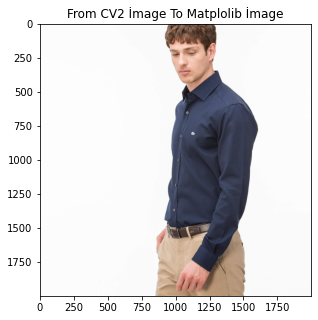

In [ ]:

converted_img_to_rgb = cv2.cvtColor(cv2_img_read_2,cv2.COLOR_BGR2RGB)

fig,ax= plt.subplots(figsize=(15,5))

ax.imshow(converted_img_to_rgb)
ax.set_title('From CV2 İmage To Matplolib İmage')

plt.show()

**4. EN ÖNEMLI Image Türü: GRAY_SCALE RGB'TEN GRAY'A dönüşümü**

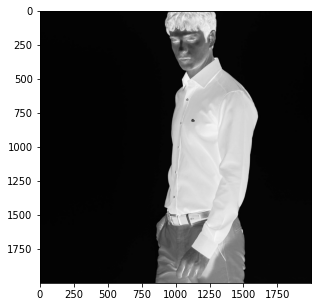

In [ ]:
#let's convert our image to GrayColor befor processing
converted_img_to_rgb = cv2.cvtColor(cv2_img_read_2,cv2.COLOR_RGB2GRAY)

fig,ax= plt.subplots(figsize=(15,5))

ax.imshow(converted_img_to_rgb,cmap='Greys')

plt.show()

**5. IMAGE RESIZING: VERI BOYUT DEĞIŞTIRME**

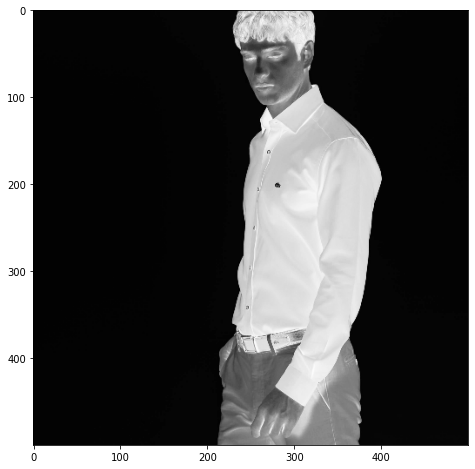

In [ ]:
#Resizing and scalling
resized_img = cv2.resize(converted_img_to_rgb ,None, fx= 0.25,fy=0.25)
#resized_img = cv2.resize(mpl_img_read_2 ,(200,200), interpolation=cv2.INTER_CUBIC)

fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(resized_img, cmap='Greys')

plt.show()

# **VERI NORMALIZASYON**

In [ ]:
normalized_data=converted_img_to_rgb/255
normalized_data

array([[0.98823529, 0.98823529, 0.98823529, ..., 0.98823529, 0.98823529,
        0.98823529],
       [0.98823529, 0.98823529, 0.98823529, ..., 0.98823529, 0.98823529,
        0.98823529],
       [0.98823529, 0.98823529, 0.98823529, ..., 0.98823529, 0.98823529,
        0.98823529],
       ...,
       [0.98823529, 0.98823529, 0.98823529, ..., 0.98039216, 0.98039216,
        0.98039216],
       [0.98823529, 0.98823529, 0.98823529, ..., 0.98039216, 0.98039216,
        0.98039216],
       [0.98823529, 0.98823529, 0.98823529, ..., 0.98039216, 0.98039216,
        0.98039216]])

# **NORMALIZE VERIYI GÖSELDE BAKALIM**

<function matplotlib.pyplot.show(*args, **kw)>

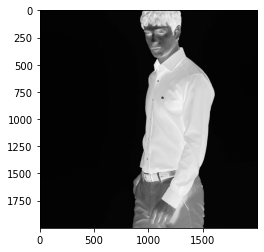

In [ ]:
# The Visualition of Converted image Normalization of Convert

plt.imshow(normalized_data,cmap='Greys')

plt.show

# **GRAFIKSAL ĞÖRSELEŞTIRME**

<function matplotlib.pyplot.show(*args, **kw)>

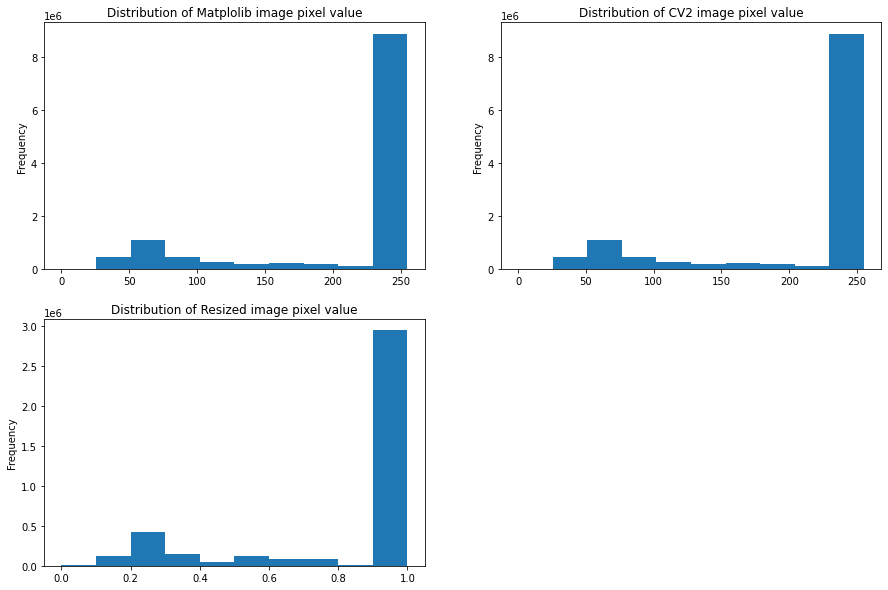

In [ ]:
from matplotlib import colors
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
#fig,ax= plt.subplots(1,3, figsize=(15,5))
pd.Series(mpl_img_read_2.flatten()).plot(kind='hist', bins=10, title='Distribution of Matplolib image pixel value')

plt.subplot(2,2,2)
pd.Series(cv2_img_read.flatten()).plot(kind='hist', bins=10, title='Distribution of CV2 image pixel value')
plt.subplot(2,2,3)
pd.Series(normalized_data.flatten()).plot(kind='hist', bins=10, title='Distribution of Resized image pixel value')

plt.show

# **Bütün Verimiz için : VERI ÖNIŞLEME FONKSYONU**

In [ ]:
def prepare_dataSet(img_folder):  # data preprocessing function : conversion,resizing,normalization...
    img_data_array=[]
    class_name=[]
    
    for dir1 in os.listdir(img_folder):
            
            for file in os.listdir(os.path.join(img_folder, dir1)):
                if dir1== 0:
                    print(dir1)
                image_path= os.path.join(img_folder, dir1,  file)
                image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(dir1, file)
                   
                else:
                    image=cv2.resize(image, (64, 64), interpolation = cv2.IMREAD_GRAYSCALE) #resizing
                    image=np.array(image)                                                   #numpy dizisine dönüştürüyor
                    image = image.astype('float32')                                         #float32 nesneye donüştürüyor
                    image =image/255                                                        #veri normalizasyon
                    img_data_array.append(image)                                            
                    class_name.append(dir1)    
    return img_data_array,class_name
# extract the image array and class name
train_set,train_label =prepare_dataSet('/content/drive/MyDrive/tasarimproje/trendyolData/trainingData')
test_set,test_label =prepare_dataSet('/content/drive/MyDrive/tasarimproje/trendyolData/testingData')


In [ ]:
#train_label

In [ ]:
print("Testing toplam veri: ")
print(len(test_label))
print("--------------------")
print("Training toplam veri: ")
print(len(train_label))

Testing toplam veri: 
2199
--------------------
Training toplam veri: 
8800


**TEK SEFERLIK LABEL ALMA**

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(train_label))} # Target Label to numpy and unique value

test_dict={k: v for v, k in enumerate(np.unique(test_label))}    # Testing data Label and unique value

#pred_dict={k: v for v, k in enumerate(np.unique(pred_label))}   # Prediction data Label and unique value
#target_dict

**LABELLERI YAZDIRMA**

In [ ]:
print(" Training Class Name: ")
print(" ")
print(np.unique(target_dict))
print(" ")
print(" ***************************************************************** ")
print(" ")
print(" Testing Class Name: ")
print(" ")
print(np.unique(test_dict))
print(" ")
print(" ***************************************************************** ")


 Training Class Name: 
 
[{'Atlet': 0, 'CocukGiyim': 1, 'Eteklik': 2, 'Gomlek': 3, 'Kotmont': 4, 'Mont': 5, 'Pantalon': 6, 'Silip': 7, 'Sort': 8, 'Tisort': 9}]
 
 ***************************************************************** 
 
 Testing Class Name: 
 
[{'Atlet': 0, 'CocukGiyim': 1, 'Eteklik': 2, 'Gomlek': 3, 'Kotmont': 4, 'Mont': 5, 'Pantalon': 6, 'Silip': 7, 'Sort': 8, 'Tisort': 9}]
 
 ***************************************************************** 


# **MODEL IMPLEMENTATION**

# **Data normalisation for machine learning Algorithm**

In [ ]:
target_val =  [target_dict[train_label[i]] for i in range(len(train_label))] # Target data 
test_val=  [test_dict[test_label[i]] for i in range(len(test_label))]
#target_val

X_input_data = np.array(train_set) # store images in X_input_data
X_test_data = np.array(test_set) # store images in X_test_data

training_label=np.array(target_val)
test_label=np.array(test_val)
Y_label = training_label.reshape(-1,1)# store labels in Y_label
Y_test_label = test_label.reshape(-1,1)# store test labels in Y_test_label


Xdata = X_input_data # store images in Xdata
Ydata = Y_label.reshape(-1,1) # store labels in Ydata

X_testing_data = X_test_data  # store labels in X_testing_data
Y_testing_label = Y_test_label.reshape(-1,1) # store test labels in Y_testing_label

In [ ]:
#-------------------------------------------- Let's Split our data-------------------------------
#x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.3, random_state=2)

x_train = Xdata
y_train = Ydata

x_test = X_testing_data
y_test = Y_testing_label

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (8800, 64, 64)
x_test:  (2199, 64, 64)
y_train:  (8800, 1)
y_test:  (2199, 1)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
#X_pred_data_Input=X_pred_data.reshape(X_pred_data.shape[0], X_pred_data.shape[1]*X_pred_data.shape[2])
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (8800, 4096)
x_test:  (2199, 4096)
y_train:  (8800, 1)
y_test:  (2199, 1)


**\-------------------------------------------MACHINE LEARNING model definition -------------**

In [ ]:
MLP_model= MLPClassifier(max_iter=1000,hidden_layer_sizes=(1000),activation="relu",solver='adam')
RF_model=RandomForestClassifier(bootstrap=True,criterion="gini", n_estimators = 1500, random_state = 100,max_depth=2500)
knn_model = KNeighborsClassifier(n_neighbors=3)
G_model=GaussianNB()
SVC_model = SVC()


------------------------------------------------------------------------------------------------data scaling --------------------------------------------------------------------------:

In [ ]:
#scaler = StandardScaler()
#x_train_transformed = scaler.fit_transform(x_train) 


------------------------------------------------------------------------------------------------Model Training--------------------------------------------------------------------------:

In [ ]:
knn_model.fit(x_train,y_train)
RF_model.fit(x_train,y_train)
G_model.fit(x_train,y_train)
SVC_model.fit(x_train,y_train)
MLP_model.fit(x_train,y_train)


MLPClassifier(hidden_layer_sizes=1000, max_iter=1000)

:------------------------------------------------------------------------------------------------Model Testing Without scaler--------------------------------------------------------------------------:

In [ ]:
kn =  knn_model.score(x_test,y_test)
RF =  RF_model.score(x_test,y_test)
G  =   G_model.score(x_test,y_test)
SVC= SVC_model.score(x_test,y_test)
MLP= MLP_model.score(x_test,y_test)

print('BEFOR PREPROCESSİNG by data Scaling')
print("")
print('KNN Score      = ',kn)
print('Random F Score = ',RF)
print('Bayes Score    = ',G)
print('SVC Score      =',SVC)
print('MLP Score      =',MLP)



BEFOR PREPROCESSİNG by data Scaling

KNN Score      =  0.6161891768985903
Random F Score =  0.8208276489313324
Bayes Score    =  0.2755798090040928
SVC Score      = 0.6607548885857207
MLP Score      = 0.7653478854024557


------------------------------------------------------------------------------------------------score graphic--------------------------------------------------------------------------:

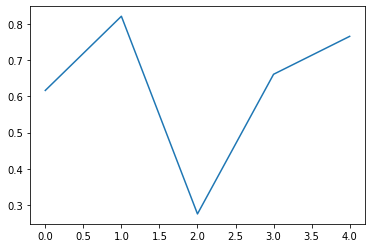

In [ ]:
score_array_list=[kn, RF,G,SVC,MLP]
plt.plot(score_array_list)


------------------------------------------------------------------------------------------------TESTING WITH SCALER--------------------------------------------------------------------------:

In [ ]:
list_accuracy=[]
scaler = StandardScaler()
x_test_transformed = scaler.fit_transform(x_test)


kn =  knn_model.score(x_test_transformed,y_test)
RF =  RF_model.score(x_test_transformed,y_test)
G  =   G_model.score(x_test_transformed,y_test)
SVC= SVC_model.score(x_test_transformed,y_test)
MLP= MLP_model.score(x_test_transformed,y_test)
list_accuracy.append(MLP)

print('SCORES SCALER :')
print('')
print('KNN Score                  = ',kn)
print('Random F Score             = ',RF)
print('Bayes Score                = ',G)
print('SVC Score                  =',SVC)
print('MLP Score                  =',MLP)



SCORES SCALER :

KNN Score                  =  0.24829467939972716
Random F Score             =  0.20054570259208732
Bayes Score                =  0.19326966803092316
SVC Score                  = 0.1377899045020464
MLP Score                  = 0.3497044110959527


------------------------------------------------------------------------------------------------Score graphic with scaler--------------------------------------------------------------------------:

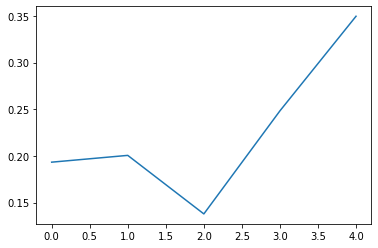

In [ ]:

score_array_list=[G,RF,SVC,kn,MLP]
plt.plot(score_array_list)



------------------------------------------------------------------------------------------------LEARNING CURVE--------------------------------------------------------------------------:

In [ ]:

import warnings
warnings.filterwarnings('ignore')



N, Knn_train_score, knn_val_score=learning_curve(knn_model,x_test,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)
N, RF_train_score, RF_val_score=learning_curve(RF_model,x_test,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)
N, G_train_score, G_val_score=learning_curve(G_model,x_test,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)
N, SVC_train_score, SVC_val_score=learning_curve(SVC_model,x_test,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)
N, MLP_train_score, MLP_val_score=learning_curve(MLP_model,x_test,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)


print(N)



plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(N,Knn_train_score.mean(axis=1),label='Train')
plt.plot(N,knn_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('KNN')
plt.legend()


plt.subplot(2,2,2)
plt.plot(N,RF_train_score.mean(axis=1),label='Train')
plt.plot(N,RF_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('Random Forest')
plt.legend()


plt.subplot(2,2,3)

plt.plot(N,G_train_score.mean(axis=1),label='Train')
plt.plot(N,G_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('Naive Bayes')
plt.legend()


plt.subplot(2,2,4)
plt.plot(N,SVC_train_score.mean(axis=1),label='Train')
plt.plot(N,SVC_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('Support Vector Machine')
plt.legend()
plt.show()





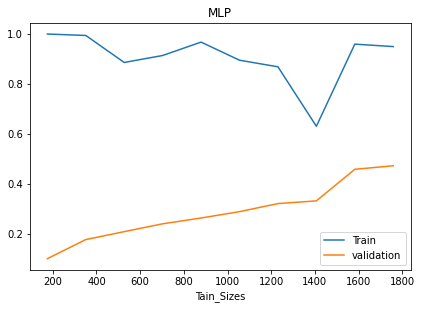

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(N,MLP_train_score.mean(axis=1),label='Train')
plt.plot(N,MLP_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('MLP')
plt.legend()

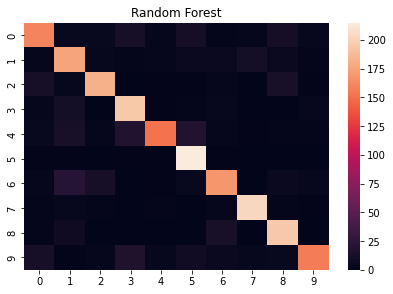

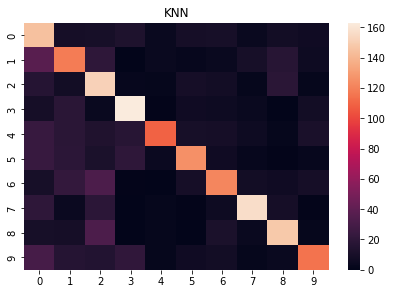

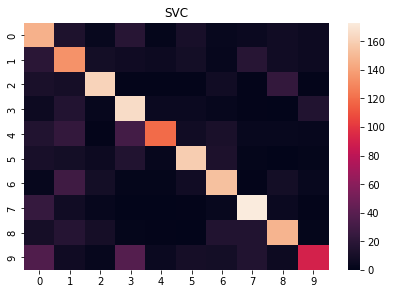

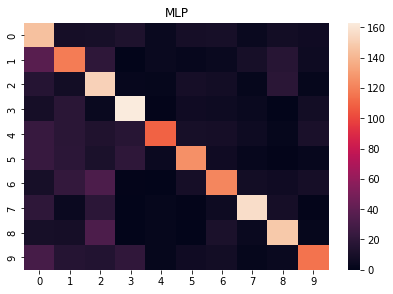

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn
RF_pred= RF_model.predict(x_test)
RF_mat = confusion_matrix(y_test, RF_pred)


knn_pred= knn_model.predict(x_test)
knn_mat = confusion_matrix(y_test, knn_pred)

SVC_pred= SVC_model.predict(x_test)
SVC_mat = confusion_matrix(y_test, SVC_pred)


MLP_pred= MLP_model.predict(x_test)
MLP_mat = confusion_matrix(y_test, MLP_pred)



plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Random Forest')
seaborn.heatmap(RF_mat)


plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.title('KNN')
seaborn.heatmap(knn_mat)


plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
plt.title('SVC')
seaborn.heatmap(SVC_mat)

plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
plt.title('MLP')
seaborn.heatmap(knn_mat)


plt.show()

------------------------------------------------------------------------------------------------Error For each algo--------------------------------------------------------------------------:

In [ ]:

knn_Pred=knn_model.predict(x_test)
RF_Pred =RF_model.predict(x_test)
G_Pred  =G_model.predict(x_test)
SVC_Pred =SVC_model.predict(x_test)
MLP_Pred=MLP_model.predict(x_test)


print('KNN ERRor:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_Pred)))
print('')
print('Random Forest ERRor:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, RF_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RF_Pred)))
print('')
print('Gaussian ERRor:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, G_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, G_Pred)))
print('')
print('SVC ERRor :')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, SVC_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,SVC_Pred)))
print('')
print('MLP ERRor :')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, MLP_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, MLP_Pred)))




KNN ERRor:
Mean Absolute Error: 1.5525238744884038
Root Mean Squared Error: 2.9069235694238733

Random Forest ERRor:
Mean Absolute Error: 0.7085038653933606
Root Mean Squared Error: 1.9437286194025372

Gaussian ERRor:
Mean Absolute Error: 2.6516598453842657
Root Mean Squared Error: 3.633568420078594

SVC ERRor :
Mean Absolute Error: 1.369713506139154
Root Mean Squared Error: 2.759744404269821

MLP ERRor :
Mean Absolute Error: 0.849931787175989
Root Mean Squared Error: 2.0979862147650654


------------------------------------------------------------------------------------------------Accuracy for each Algorithm--------------------------------------------------------------------------:

In [ ]:
list_accuracy=[]
list_names=[]
print('KNN Accurracy:')
print('Root Mean Accurracy:', accuracy_score(y_test, knn_Pred))
list_accuracy.append(accuracy_score(y_test, knn_Pred))
list_names.append("KNN")
print('')
print('Random Accurracy:')
print('Accurracy:',  accuracy_score(y_test, RF_Pred))

list_accuracy.append(accuracy_score(y_test, RF_Pred))
list_names.append("RF")
print('')
print('Gaussian Accurracy:')
print('Accurracy:',  accuracy_score(y_test, G_Pred))
list_accuracy.append(accuracy_score(y_test, G_Pred))
list_names.append("Gaussian")
print('')
print('SVM Accurracy :')
print('Accurracy:',  accuracy_score(y_test, SVC_Pred))
list_accuracy.append(accuracy_score(y_test, SVC_Pred))
list_names.append("SVM")
print('')
print('MLP Accurracy :')
print('Accurracy:',accuracy_score(y_test, MLP_Pred)  )
list_accuracy.append(accuracy_score(y_test, MLP_Pred))
list_names.append("MLP")

KNN Accurracy:
Root Mean Accurracy: 0.6161891768985903

Random Accurracy:
Accurracy: 0.8208276489313324

Gaussian Accurracy:
Accurracy: 0.2755798090040928

SVM Accurracy :
Accurracy: 0.6607548885857207

MLP Accurracy :
Accurracy: 0.7744429286039108


------------------------------------------------------------------------------------------------Mean of Validation Score--------------------------------------------------------------------------:

In [ ]:
print('MLP Validation Score=',MLP_val_score.mean(axis=1).mean())
print('SVC Validation Score=',SVC_val_score.mean(axis=1).mean())
print('Gaussian Validation Score=',G_val_score.mean(axis=1).mean())
print('KNN Validation Score=',knn_val_score.mean(axis=1).mean())
print('Rand Forest Validation Score=',RF_val_score.mean(axis=1).mean())

MLP Validation Score= 0.28620708221163804
SVC Validation Score= nan
Gaussian Validation Score= 0.1721039552702423
KNN Validation Score= 0.27337792503623937
Rand Forest Validation Score= 0.33580109753572174


------------------------------------------------------------------------------------------------------------CONVOLUTION NEURAL NETWORK CNN----------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------DATA  MINING FOR CNN-----------------------------------------------------

In [ ]:
cnn_x_train = x_train.reshape(-1,64,64,1) # Training data Reshaping
cnn_x_test  = x_test.reshape(-1,64,64,1)   # Testing data Reshaping

cnn_y_train_ = to_categorical(y_train) # training data Label  transformation for cnn learning
cnn_y_test_ = to_categorical(y_test)   # testing data Label  transformation for cnn learning

print(" Reshaped Data result: ")
print("")
print("x_train: ",cnn_x_train.shape)
print("x_test: ",cnn_x_test.shape)
print("")
print(" Training & Testing data Label transformation result: ")
print("")
print("y_train_ shape: ",cnn_y_train_.shape)
print("y_test_ shape: ",cnn_y_test_.shape)



 Reshaped Data result: 

x_train:  (8800, 64, 64, 1)
x_test:  (2199, 64, 64, 1)

 Training & Testing data Label transformation result: 

y_train_ shape:  (8800, 10)
y_test_ shape:  (2199, 10)


-----------------------------------------------------------------------------------------CONVOLUTION NEURAL NETWORK CNN-------------------------------------------------------------------------

In [ ]:
cnn_model = Sequential()   # define CNN model


cnn_model.add(Conv2D(filters = 10, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters = 15, kernel_size = (6,6),padding = 'Same', 
                 activation ='relu'))

cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

cnn_model.add(Flatten())
cnn_model.add(Dense(25, activation = "relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#optimizer = Adam()
#optimizer = SGD()
#optimizer=Nadam()
#optimizer=Adamax()
cnn_model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=2, 
                                            factor=0.7, 
                                            min_lr=0.000001)

epoch =600
batch_size = 50

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5,  
        zoom_range = 0.05, 
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=False,  
        vertical_flip=False)  
datagen.fit(cnn_x_train)

history = cnn_model.fit(cnn_x_train,cnn_y_train_, batch_size=50,
epochs = epoch, 
validation_data = (cnn_x_test,cnn_y_test_),
verbose = 2, 
steps_per_epoch=10
                )



NameError: ignored

-------------------------------------------------------------------------------------------------------------------CNN ERROR--------------------------------------------------------------------------

In [ ]:
print('CNN ERRor :')
print('Mean Absolute Error:', metrics.mean_absolute_error(cnn_y_test_, cnn_model.predict(cnn_x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(cnn_y_test_, cnn_model.predict(cnn_x_test))))


CNN ERRor :


NameError: ignored

---------------------------------------------------------------------------------------------------------------------CNN ACCURACY------------------------------------------------------------------------

In [ ]:


predict_x=cnn_model.predict(cnn_x_test) 
cnn_y_pred=np.argmax(predict_x,axis=1)

y_test = y_test.reshape(-1,)

diff = y_test - cnn_y_pred

diff = diff.reshape(-1,1)
true = 0
for i in range(0,len(diff)):
    if diff[i] == 0:
        true = true + 1

Cnn_accuracy = round(1*true/len(diff),2)


print("Cnn_accuracy is %", Cnn_accuracy)

list_names.append("CNN")
list_accuracy.append(Cnn_accuracy)


69/69 [==============================] - 5s 65ms/step
Cnn_accuracy is % 0.69


In [ ]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY(%)': list_accuracy})
df = df.sort_values(by=['ACCURACY(%)'])
df = df.reset_index(drop=True)
df

METHOD  ACCURACY(%)
0  Gaussian     0.275784
1       KNN     0.616084
2       SVM     0.660609
3       MLP     0.720127
4       CNN     0.780000
5       CNN     0.780000
6       CNN     0.780000
7        RF     0.820536

In [ ]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 64, 10)        100       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 10)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 32, 32, 10)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 15)        5415      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 15)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 15)       

--------------------------------------------------------------------------------------precision and F1 Score--------------------------------------------------------------------------

In [ ]:
#
CNN_predict_class=np.argmax( cnn_model.predict(cnn_x_test),axis=1)


RF_predict_class=RF_model.predict(x_test)
SVC_predict_class=SVC_model.predict(x_test)
KNN_predict_class=knn_model.predict(x_test)
G_predict_class=G_model.predict(x_test)
MLP_predict_class=MLP_model.predict(x_test)


Model_name = []
precision =[]
model_f1_score=[]

CNN_precision = precision_score(y_test,CNN_predict_class,pos_label='positive',average='macro')
CNN_f1_score = f1_score(y_test,CNN_predict_class,pos_label='positive',average='macro')
Model_name.append("CNN")
precision.append(CNN_precision)
model_f1_score.append(CNN_f1_score )

RF_precision = precision_score(y_test,RF_predict_class,pos_label='positive',average='macro')
RF_f1_score = f1_score(y_test,RF_predict_class,pos_label='positive',average='macro')
Model_name.append("RF")
precision.append(RF_precision)
model_f1_score.append(RF_f1_score )

SVC_precision = precision_score(y_test,SVC_predict_class,pos_label='positive',average='macro')
SVC_f1_score= f1_score(y_test,SVC_predict_class,pos_label='positive',average='macro')
Model_name.append("SVC")
precision.append(SVC_precision)
model_f1_score.append(SVC_f1_score )

KNN_precision = precision_score(y_test,KNN_predict_class,pos_label='positive',average='macro')
KNN_f1_score = f1_score(y_test,KNN_predict_class,pos_label='positive',average='macro')
Model_name.append("KNN")
precision.append(KNN_precision)
model_f1_score.append(KNN_f1_score)

G_precision = precision_score(y_test,G_predict_class,pos_label='positive',average='macro')
G_f1_score = f1_score(y_test,G_predict_class,pos_label='positive',average='macro')
Model_name.append("G")
precision.append(G_precision)
model_f1_score.append(G_f1_score)

MLP_precision = precision_score(y_test,MLP_predict_class,pos_label='positive',average='macro')
MLP_f1_score = f1_score(y_test,MLP_predict_class,pos_label='positive',average='macro')
Model_name.append("MLP")
precision.append(MLP_precision)
model_f1_score.append(MLP_f1_score)


69/69 [==============================] - 5s 66ms/step


In [ ]:
p_val = pd.DataFrame({'METHOD': Model_name, 'precision_score(%)': precision})
p_val = df.sort_values(by=['ACCURACY(%)'])
p_val = df.reset_index(drop=True)
print("")
print("PRECISION FOR EACH MODEL: ")
print("")

p_val



PRECISION FOR EACH MODEL: 



METHOD  ACCURACY(%)
0  Gaussian     0.275784
1       KNN     0.616084
2       SVM     0.660609
3       MLP     0.720127
4       CNN     0.780000
5       CNN     0.780000
6       CNN     0.780000
7        RF     0.820536

In [ ]:
for i in range(0,len(model_f1_score)):
  print(Model_name[i]+": ",model_f1_score[i])

CNN:  0.7837169276777936
RF:  0.8190517805281038
SVC:  0.6598416880394316
KNN:  0.6196328570224432
G:  0.24614343129368285
MLP:  0.7181742196626119


In [ ]:
from sklearn.metrics import recall_score
print(" RECALL VALUE FOR EACH ALGO: ")
print("")
print("CNN RECALL_SCORE: ",recall_score(y_test, CNN_predict_class,pos_label='positive',average='macro'))
print("RF RECALL_SCORE: ",recall_score(y_test, RF_predict_class,pos_label='positive',average='macro'))
print("SVC RECALL_SCORE: ",recall_score(y_test, SVC_predict_class,pos_label='positive',average='macro'))
print("KNN RECALL_SCORE: ",recall_score(y_test, KNN_predict_class,pos_label='positive',average='macro'))
print("G RECALL_SCORE: ",recall_score(y_test, G_predict_class,pos_label='positive',average='macro'))
print("MLP RECALL_SCORE: ",recall_score(y_test, MLP_predict_class,pos_label='positive',average='macro'))

 RECALL VALUE FOR EACH ALGO: 

CNN RECALL_SCORE:  0.7819086795557384
RF RECALL_SCORE:  0.8205635540929659
SVC RECALL_SCORE:  0.660592348827643
KNN RECALL_SCORE:  0.6161127108185932
G RECALL_SCORE:  0.2757466063348416
MLP RECALL_SCORE:  0.7201275195392843


-------------------------------------------------------------------------------------------------------------PRE-TRAİNED MODEL--------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------AlexNet Implementation  ----------------------------------------------------------------------------------

In [ ]:

AlexNet_model = keras.Sequential()
AlexNet_model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(64, 64, 1)))   
AlexNet_model.add(layers.BatchNormalization())
AlexNet_model.add(layers.MaxPool2D(pool_size=(2, 2), strides= (2, 2)))
AlexNet_model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet_model.add(layers.BatchNormalization())
AlexNet_model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
AlexNet_model.add(layers.Conv2D(filters=384, kernel_size=(2, 2), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet_model.add(layers.BatchNormalization())
AlexNet_model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet_model.add(layers.BatchNormalization())
AlexNet_model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet_model.add(layers.BatchNormalization())
AlexNet_model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
AlexNet_model.add(layers.Flatten())
AlexNet_model.add(layers.Dense(4096, activation="relu"))
AlexNet_model.add(layers.Dropout(0.5))
AlexNet_model.add(layers.Dense(10, activation="softmax"))
AlexNet_model.compile(
loss='categorical_crossentropy',
optimizer=tf.optimizers.SGD(lr=0.001),
metrics=['accuracy'])


epoch = 1
batch_size = 1

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5,  
        zoom_range = 0.05, 
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=False,  
        vertical_flip=False)  
datagen.fit(cnn_x_train)

history = AlexNet_model.fit(cnn_x_train,cnn_y_train_, batch_size=1,
epochs = epoch, 
validation_data = (cnn_x_test,cnn_y_test_),
verbose = 2, 
steps_per_epoch=1
                )



1/1 - 17s - loss: 0.4369 - accuracy: 1.0000 - val_loss: 2.3027 - val_accuracy: 0.0990 - 17s/epoch - 17s/step


In [ ]:
#import visualkeras
#visualkeras.layered_view(AlexNet_model)


--------------------------------------------------------------------------VGG_NET IMPLEMENTATION----------------------------------------

In [ ]:
#from keras.optimizers import Adam
cnn_x_train = x_train.reshape(-1,64,64,1) # Training data Reshaping
cnn_x_test = x_test.reshape(-1,64,64,1)   # Testing data Reshaping

cnn_y_train_ = to_categorical(y_train) # training data Label  transformation for cnn learning
cnn_y_test_ = to_categorical(y_test)   # testing data Label  transformation for cnn learning

traindata= cnn_x_train

testdata =cnn_x_test
#---------------------------------------DEFINE OUR VGG_NET MODEL---------------------------
VGG_NET_model = Sequential()
VGG_NET_model.add(Conv2D(input_shape=(64,64,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG_NET_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG_NET_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG_NET_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG_NET_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG_NET_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG_NET_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_NET_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG_NET_model.add(Flatten())
VGG_NET_model.add(Dense(units=4096,activation="relu"))
VGG_NET_model.add(Dense(units=10,activation="relu"))
VGG_NET_model.add(Dense(units=10, activation="softmax"))

opt = Adam(lr=0.001)
VGG_NET_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history = VGG_NET_model.fit(cnn_x_train,cnn_y_train_, batch_size=2,
epochs = 10, 
validation_data = (cnn_x_test,cnn_y_test_),
verbose = 2, 
steps_per_epoch=1
                )


Epoch 1/10


1/1 - 115s - loss: 2.3024 - accuracy: 0.0000e+00 - val_loss: 2.6152 - val_accuracy: 0.1000 - 115s/epoch - 115s/step
Epoch 2/10
1/1 - 113s - loss: 2.6064 - accuracy: 0.0000e+00 - val_loss: 2.3029 - val_accuracy: 0.1004 - 113s/epoch - 113s/step
Epoch 3/10
1/1 - 116s - loss: 2.3156 - accuracy: 0.0000e+00 - val_loss: 2.3028 - val_accuracy: 0.1004 - 116s/epoch - 116s/step
Epoch 4/10
1/1 - 115s - loss: 2.3169 - accuracy: 0.0000e+00 - val_loss: 2.3027 - val_accuracy: 0.1004 - 115s/epoch - 115s/step
Epoch 5/10
1/1 - 113s - loss: 2.3166 - accuracy: 0.0000e+00 - val_loss: 2.3026 - val_accuracy: 0.1004 - 113s/epoch - 113s/step
Epoch 6/10
1/1 - 113s - loss: 2.2943 - accuracy: 0.5000 - val_loss: 2.3026 - val_accuracy: 0.1004 - 113s/epoch - 113s/step
Epoch 7/10
1/1 - 119s - loss: 2.2962 - accuracy: 0.0000e+00 - val_loss: 2.3028 - val_accuracy: 0.1004 - 119s/epoch - 119s/step
Epoch 8/10
1/1 - 114s - loss: 2.2726 - accuracy: 0.0000e+00 - val_loss: 2.3045 - val_accuracy: 0.1004 - 114s/epoch - 114s/step

# ----------------------------------------------------PREDICTION------------------------------------------------------

# New Section

In [ ]:
def prepare_dataSet(img_folder):
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
            
            for file in os.listdir(os.path.join(img_folder, dir1)):
                if dir1== 0:
                    print(dir1)
                image_path= os.path.join(img_folder, dir1,  file)
                image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(dir1, file)
                else:
                    image=cv2.resize(image, (64, 64),interpolation = cv2.IMREAD_GRAYSCALE)
                    image=np.array(image)
                    image = image.astype('float32')
                    image =image/255 
                    img_data_array.append(image)
                    class_name.append(dir1)
    return img_data_array,class_name
# extract the image array and class name
pred_data,pred_label =prepare_dataSet('/content/drive/MyDrive/tasarimproje/trendyolData/tahmin_data')


X_pred_data = np.array(pred_data) # store images in X_pred_data & numpy format

x_input =X_pred_data.reshape(X_pred_data.shape[0], X_pred_data.shape[1]*X_pred_data.shape[2])

X_pred_data = np.array(pred_data) # store images in X_pred_data & numpy format

x_input =X_pred_data.reshape(X_pred_data.shape[0], X_pred_data.shape[1]*X_pred_data.shape[2])

cnn_x_input = X_pred_data.reshape(-1,64,64,1) # Training data Reshaping







-----------------------------------------------------------------------------------------Let's predict the value------------------------------------------------------------------

In [ ]:
k=cnn_model.predict(cnn_x_input)
max_value = max(k[0])
if max_value < 0.5 :
  print("This image is not in the dataBase");

if max_value > 0.5:
    p= np.argmax( cnn_model.predict(cnn_x_input),axis=1) # YOU CAN CNN_MODEL
    for i in p:
      #print(i)
      class_dictionary = target_dict
      #list out keys and values separately
      key_list = list(class_dictionary.keys())
      val_list = list(class_dictionary.values())
      # print key with val predict
      position = val_list.index(i)
      print("PREDICTION VALUE :")
      print("")
      print("RESULT : ",key_list[position], end='')
  


1/1 [==============================] - 0s 23ms/step
PREDICTION VALUE :

RESULT :  Eteklik